In [1]:
import os
os.chdir('..')
print(f'Current working directory is {os.getcwd()}')

Current working directory is C:\Users\solid\Documents\NSS_Projects\accre-pumpkin-pie


In [2]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [3]:
jobs = pd.read_csv("data/fullsample (1).csv")
jobs.head(5)

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE
0,30616928,RUNNING,2021-07-31T22:15:00,Unknown,2048Mn,0,10:04:00,67-22:14:22,1,1,production,0:0
1,30853133,COMPLETED,2021-08-06T11:36:09,2021-09-05T11:36:32,262144Mn,20604.62M,30-00:00:00,30-00:00:23,1,1,cgw-platypus,0:0
2,30858137,COMPLETED,2021-08-06T19:04:39,2021-09-05T19:04:53,204800Mn,57553.77M,30-00:00:00,30-00:00:14,1,32,cgw-tbi01,0:0
3,30935078,COMPLETED,2021-08-09T16:52:51,2021-09-07T20:52:55,65536Mn,20577.96M,29-04:00:00,29-04:00:04,1,8,cgw-platypus,0:0
4,31364111_2,COMPLETED,2021-08-17T07:45:07,2021-09-10T16:45:24,16384Mn,9733.43M,24-09:00:00,24-09:00:17,1,1,production,0:0


In [4]:
#"%Y/%m/%d %H:%M:%S"

In [5]:
jobs = pd.read_csv("data/fullsample (1).csv", usecols=['JOBID','STATE','BEGIN','END','EXITCODE','REQMEM','USEDMEM','REQTIME','USEDTIME', 'NODES', 'CPUS'])

In [6]:
jobs_filtered = jobs[(jobs['STATE'] == 'COMPLETED') | (jobs['STATE'] == 'FAILED')].copy()

In [7]:
jobs_filtered['END'] = jobs_filtered['END'].str.replace('T', ' ')
jobs_filtered['END'] = pd.to_datetime(jobs_filtered['END'], format = "%Y-%m-%d %H:%M:%S")
jobs_filtered.head(5)

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,EXITCODE
1,30853133,COMPLETED,2021-08-06T11:36:09,2021-09-05 11:36:32,262144Mn,20604.62M,30-00:00:00,30-00:00:23,1,1,0:0
2,30858137,COMPLETED,2021-08-06T19:04:39,2021-09-05 19:04:53,204800Mn,57553.77M,30-00:00:00,30-00:00:14,1,32,0:0
3,30935078,COMPLETED,2021-08-09T16:52:51,2021-09-07 20:52:55,65536Mn,20577.96M,29-04:00:00,29-04:00:04,1,8,0:0
4,31364111_2,COMPLETED,2021-08-17T07:45:07,2021-09-10 16:45:24,16384Mn,9733.43M,24-09:00:00,24-09:00:17,1,1,0:0
5,31364111_3,COMPLETED,2021-08-17T07:45:07,2021-09-06 16:17:34,16384Mn,9708.04M,24-09:00:00,20-08:32:27,1,1,0:0


In [8]:
jobs_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7378850 entries, 1 to 7395884
Data columns (total 11 columns):
 #   Column    Dtype         
---  ------    -----         
 0   JOBID     object        
 1   STATE     object        
 2   BEGIN     object        
 3   END       datetime64[ns]
 4   REQMEM    object        
 5   USEDMEM   object        
 6   REQTIME   object        
 7   USEDTIME  object        
 8   NODES     int64         
 9   CPUS      int64         
 10  EXITCODE  object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 675.6+ MB


In [9]:
jobs_filtered['REQTIME'] = jobs_filtered['REQTIME'].astype(str)
jobs_filtered['USEDTIME'] = jobs_filtered['USEDTIME'].astype(str)

In [10]:
jobs_filtered_reqtime = jobs_filtered['REQTIME'].to_list()
total_seconds_list = []
for string in jobs_filtered_reqtime:
    match = re.match(r'(\d+)-(\d+):(\d+):(\d+)', string)

    if match:
        days = int(match.group(1))
        hours = int(match.group(2))
        minutes = int(match.group(3))
        seconds = int(match.group(4))
    
   
        total_seconds = (days * 24 * 3600) + (hours * 3600) + (minutes * 60) + seconds
    
        total_seconds_list.append(total_seconds)

jobs_filtered['REQTIME'] = pd.Series(total_seconds_list)


In [11]:
jobs_filtered_usedtime = jobs_filtered['USEDTIME'].to_list()
total_seconds_list2 = []
for string in jobs_filtered_usedtime:
    match = re.match(r'(\d+)-(\d+):(\d+):(\d+)', string)

    if match:
        days = int(match.group(1))
        hours = int(match.group(2))
        minutes = int(match.group(3))
        seconds = int(match.group(4))
    
   
        total_seconds2 = (days * 24 * 3600) + (hours * 3600) + (minutes * 60) + seconds
    
        total_seconds_list2.append(total_seconds2)

jobs_filtered['USEDTIME'] = pd.Series(total_seconds_list2)


In [12]:
jobs_filtered['TIME_DIFFERENCE'] = jobs_filtered['USEDTIME'] - jobs_filtered['REQTIME']

In [13]:
user_ninety_two_oh_four_failures = pd.read_csv('data/final_log_csv.csv')
user_ninety_two_oh_four_failures['DateTime'] = pd.to_datetime(user_ninety_two_oh_four_failures['Date'] + ' ' + user_ninety_two_oh_four_failures['Time'])
user_ninety_two_oh_four_failures = user_ninety_two_oh_four_failures.drop(columns = 'Unnamed: 0')
user_ninety_two_oh_four_failures

,Date,Time,User,Retry,Length_of_Time,ReturnCode,Command,Server,DateTime
0,2020-10-18,06:16:25,user 9204,retry 0,20.037672,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",ce6,2020-10-18 06:16:25
1,2020-10-18,06:38:44,user 9204,retry 0,20.038736,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",ce6,2020-10-18 06:38:44
2,2020-10-18,06:53:44,user 9204,retry 0,20.038464,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",ce5,2020-10-18 06:53:44
3,2020-10-18,06:54:04,user 9204,retry 1,20.048906,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",ce5,2020-10-18 06:54:04
4,2020-10-18,07:47:25,user 9204,retry 0,20.082628,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",ce5,2020-10-18 07:47:25
...,...,...,...,...,...,...,...,...,...
3291,2021-09-24,18:14:35,user 9204,retry 0,20.041436,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",ce5,2021-09-24 18:14:35
3292,2021-09-24,19:13:14,user 9204,retry 0,20.051321,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",ce5,2021-09-24 19:13:14
3293,2021-10-02,08:14:16,user 9204,retry 0,19.083227,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",ce5,2021-10-02 08:14:16
3294,2021-10-02,18:29:08,user 9204,retry 0,20.043146,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",ce5,2021-10-02 18:29:08


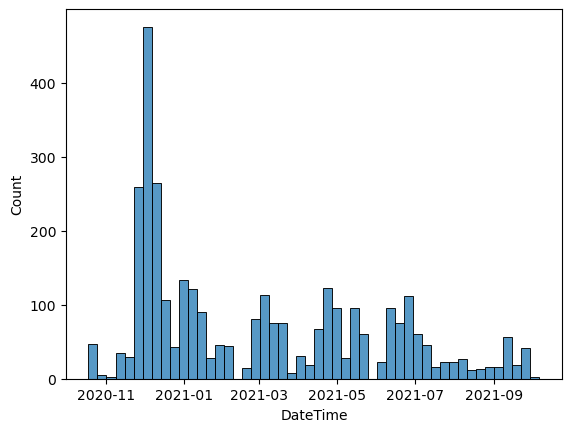

In [14]:
sns.histplot(data =user_ninety_two_oh_four_failures, x='DateTime', bins=50)
plt.show()

In [15]:
user_date_high = pd.to_datetime('2020-12-04').date()
user_high_failure_day_df = user_ninety_two_oh_four_failures[user_ninety_two_oh_four_failures['DateTime'].dt.date == user_date_high]

In [16]:
user_high_failure_day_df.head(2)

,Date,Time,User,Retry,Length_of_Time,ReturnCode,Command,Server,DateTime
589,2020-12-04,10:00:34,user 9204,retry 0,20.045381,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",ce5,2020-12-04 10:00:34
590,2020-12-04,10:22:23,user 9204,retry 0,20.021241,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",ce6,2020-12-04 10:22:23


In [17]:
time_something = user_high_failure_day_df['Time'].value_counts().index[0]

In [18]:
something_df = user_high_failure_day_df[user_high_failure_day_df['Time'] == time_something]

In [19]:
something_df

,Date,Time,User,Retry,Length_of_Time,ReturnCode,Command,Server,DateTime
599,2020-12-04,10:52:19,user 9204,retry 2,20.424641,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",ce5,2020-12-04 10:52:19
600,2020-12-04,10:52:19,user 9204,retry 0,20.036723,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",ce6,2020-12-04 10:52:19


## Filter Logs by high failure interval

<h5>Based on Week</h5>

In [22]:
# High failures seen for 9204 between 2020-12-02 and 2021-01-01
start_date_high = pd.to_datetime('2020-12-02').date()
end_time_high = pd.to_datetime('2020-12-09').date()

high_failures_df = jobs_filtered[(jobs_filtered['END'].dt.date >= start_date_high) & (jobs_filtered['END'].dt.date <= end_time_high)].reset_index(drop=True)

<h5>Based on Day</h5>

In [24]:
date_high = pd.to_datetime('2020-12-04').date()
high_failures_day_df = jobs_filtered[jobs_filtered['END'].dt.date == date_high]

<h5>Based on Time Frame</h5>

In [26]:
start_time_high_fail = pd.to_datetime('2020-12-04 10:40:19')
end_time_high_fail = pd.to_datetime('2020-12-04 10:52:19')

high_failure_timeframe_df = jobs_filtered[(jobs_filtered['END'] >= start_time_high_fail) & (jobs_filtered['END'] <= end_time_high_fail)].reset_index(drop=True)

In [27]:
high_failures_day_df['END'].dt.time.value_counts()

END
08:28:27    173
08:28:26     40
14:45:46     37
17:29:45     33
16:20:45     28
           ... 
01:05:54      1
01:05:35      1
01:07:29      1
01:03:49      1
23:45:27      1
Name: count, Length: 8461, dtype: int64

## Filter Logs by low failure interval

<h5>Based on Week</h5>

In [30]:
start_date_low = pd.to_datetime('2021-08-21').date()
end_time_low = pd.to_datetime('2021-08-28').date()

low_failures_df = jobs_filtered[(jobs_filtered['END'].dt.date >= start_date_low) & (jobs_filtered['END'].dt.date <= end_time_low)].reset_index(drop=True)

<h5>Based on Day</h5>

In [32]:
date_low = pd.to_datetime('2021-03-23').date()
low_failures_day_df = jobs_filtered[jobs_filtered['END'].dt.date == date_low]

<h5>Based on Time Frame</h5>

In [34]:
start_time_low_fail = pd.to_datetime('2021-03-23 10:40:19')
end_time_low_fail = pd.to_datetime('2021-03-23 10:52:19')

low_failure_timeframe_df = jobs_filtered[(jobs_filtered['END'] >= start_time_low_fail) & (jobs_filtered['END'] <= end_time_low_fail)].reset_index(drop=True)

<h1>EDA

In [36]:
display(high_failures_df.shape)
display(low_failures_df.shape)

(140244, 12)

(256113, 12)

In [37]:
display(high_failures_day_df.shape)
display(low_failures_day_df.shape)

(17542, 12)

(19938, 12)

Investigate time area around 10:52:19 on 2020-12-04 and 2021-03-23

In [39]:
display(high_failure_timeframe_df.shape)
display(low_failure_timeframe_df.shape)

(64, 12)

(187, 12)

<h3>Typical Count of Jobs By Hour Dataframe

In [41]:
jobs_filtered.head(100)

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,EXITCODE,TIME_DIFFERENCE
1,30853133,COMPLETED,2021-08-06T11:36:09,2021-09-05 11:36:32,262144Mn,20604.62M,2592000.0,2592014.0,1,1,0:0,14.0
2,30858137,COMPLETED,2021-08-06T19:04:39,2021-09-05 19:04:53,204800Mn,57553.77M,2520000.0,2520004.0,1,32,0:0,4.0
3,30935078,COMPLETED,2021-08-09T16:52:51,2021-09-07 20:52:55,65536Mn,20577.96M,2106000.0,2106017.0,1,8,0:0,17.0
4,31364111_2,COMPLETED,2021-08-17T07:45:07,2021-09-10 16:45:24,16384Mn,9733.43M,2106000.0,1758747.0,1,1,0:0,-347253.0
5,31364111_3,COMPLETED,2021-08-17T07:45:07,2021-09-06 16:17:34,16384Mn,9708.04M,2106000.0,1723204.0,1,1,0:0,-382796.0
...,...,...,...,...,...,...,...,...,...,...,...,...
98,31762549,COMPLETED,2021-08-30T07:54:00,2021-09-01 05:40:36,28000Mn,16727.56M,172800.0,167023.0,1,4,0:0,-5777.0
99,31762550,COMPLETED,2021-08-30T07:54:59,2021-09-01 07:14:09,28000Mn,11096.74M,172800.0,168832.0,1,4,0:0,-3968.0
100,31762591,COMPLETED,2021-08-30T07:14:59,2021-09-01 05:24:37,21875Mn,12145M,172800.0,159810.0,1,8,0:0,-12990.0
101,31762604,COMPLETED,2021-08-30T08:03:59,2021-09-01 06:27:42,28000Mn,10472.11M,172800.0,152885.0,1,4,0:0,-19915.0


In [42]:
jobs_filtered['USEDMEM'] = jobs_filtered['USEDMEM'].str.replace('M','').astype(float)

In [43]:
typical_day_count = jobs_filtered.groupby([jobs_filtered['END'].dt.date, jobs_filtered['END'].dt.hour]).agg({'JOBID':'count', 'USEDMEM':'mean', 'TIME_DIFFERENCE':'sum'})
typical_day_count.index.names = ['Date', 'Hour']

In [44]:
typical_day_count.describe()

,JOBID,USEDMEM,TIME_DIFFERENCE
count,8922.000000,8922.000000,8.922000e+03
mean,827.039901,4388.928793,-2.266306e+06
std,1187.305298,4743.361533,3.109730e+07
min,2.000000,0.022500,-1.908644e+09
25%,250.000000,1788.929118,0.000000e+00
50%,487.500000,3186.458832,0.000000e+00
75%,907.750000,5323.608134,0.000000e+00
max,13346.000000,125438.190000,2.587094e+08


In [45]:
typical_day_count.shape

(8922, 3)

In [46]:
typical_day_count.head(100)

JOBID      USEDMEM  TIME_DIFFERENCE
Date       Hour                                     
2020-10-01 0       421    19.167886              0.0
           1      1080    13.272481              0.0
           2      1137    14.093026              0.0
           3      1018    14.400530              0.0
           4      1244   307.038947              0.0
...                ...          ...              ...
2020-10-04 23      796  4900.537839              0.0
2020-10-05 0       681  5966.311821              0.0
           1       608  4632.298487              0.0
           2      1049  3203.901830              0.0
           3       891  3593.392570              0.0

[100 rows x 3 columns]

<Axes: xlabel='JOBID', ylabel='Count'>

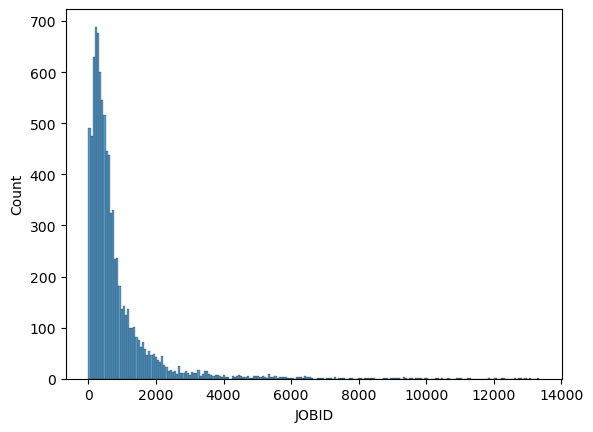

In [47]:
sns.histplot(data = typical_day_count, x='JOBID')

In [48]:
typical_day_count.head(2)

JOBID    USEDMEM  TIME_DIFFERENCE
Date       Hour                                   
2020-10-01 0       421  19.167886              0.0
           1      1080  13.272481              0.0

In [49]:
user_ninety_two_oh_four_failures.head(2)

,Date,Time,User,Retry,Length_of_Time,ReturnCode,Command,Server,DateTime
0,2020-10-18,06:16:25,user 9204,retry 0,20.037672,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",ce6,2020-10-18 06:16:25
1,2020-10-18,06:38:44,user 9204,retry 0,20.038736,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",ce6,2020-10-18 06:38:44


## 9204 User Failures by typical failures

In [51]:
typical_day_count_user = user_ninety_two_oh_four_failures.groupby([user_ninety_two_oh_four_failures['DateTime'].dt.date, user_ninety_two_oh_four_failures['DateTime'].dt.hour])['User'].size()
typical_day_count_user.index.names = ['Date', 'Hour']

In [52]:
typical_day_count_user.head()
typical_day_vs_userfailures = pd.merge(typical_day_count,typical_day_count_user , left_index=True,right_index=True, how = 'outer')

In [53]:
typical_day_vs_userfailures.head(2)

JOBID    USEDMEM  TIME_DIFFERENCE  User
Date       Hour                                          
2020-10-01 0      421.0  19.167886              0.0   NaN
           1     1080.0  13.272481              0.0   NaN

<h3>Created Dataframe Based on Pass or Fail by Date/Hour</h3>

In [55]:
typical_day_vs_userfailures['fail_or_not'] = typical_day_vs_userfailures['User'].apply(lambda x: 1 if x > 0 else 0)

In [56]:
typical_day_vs_userfailures.head(2)

JOBID    USEDMEM  TIME_DIFFERENCE  User  fail_or_not
Date       Hour                                                       
2020-10-01 0      421.0  19.167886              0.0   NaN            0
           1     1080.0  13.272481              0.0   NaN            0

In [57]:
import statsmodels.formula.api as smf

In [58]:
tdvuf_logreg = smf.logit("fail_or_not ~ USEDMEM",
                          data = typical_day_vs_userfailures).fit()

Optimization terminated successfully.
         Current function value: 0.422717
         Iterations 6


In [59]:
tdvuf_logreg.params

Intercept   -1.566412
USEDMEM     -0.000039
dtype: float64

In [60]:
tdvuf_logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            fail_or_not   No. Observations:                 8922
Model:                          Logit   Df Residuals:                     8920
Method:                           MLE   Df Model:                            1
Date:                Tue, 03 Dec 2024   Pseudo R-squ.:                0.003503
Time:                        00:56:35   Log-Likelihood:                -3771.5
converged:                       True   LL-Null:                       -3784.7
Covariance Type:            nonrobust   LLR p-value:                 2.613e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5664      0.044    -35.844      0.000      -1.652      -1.481
USEDMEM    -3.914e-05   8.24e-06     -4.748      0.000   -5.53e-05    -2.3e-05
==============================================================================
"""

In [61]:
tdvuf_summary = (
    typical_day_vs_userfailures
    .assign(group = pd.qcut(typical_day_vs_userfailures['USEDMEM'], 
                            q = 10, 
                            duplicates = 'drop'))
    .groupby('group', observed = False)
    [['USEDMEM', 'fail_or_not']]
    .mean()
    .reset_index()
    .rename(columns = {'fail_or_not': 'eprob'})
)
tdvuf_summary

,group,USEDMEM,eprob
0,"(0.0215, 971.042]",540.164848,0.119821
1,"(971.042, 1542.35]",1262.921288,0.199552
2,"(1542.35, 2067.928]",1800.783569,0.187220
3,"(2067.928, 2614.637]",2338.636565,0.179372
4,"(2614.637, 3186.459]",2899.907741,0.164798
5,"(3186.459, 3826.316]",3502.047528,0.155830
6,"(3826.316, 4678.698]",4239.202422,0.156951
7,"(4678.698, 6111.48]",5331.075752,0.139013
8,"(6111.48, 8978.479]",7311.163508,0.115471
9,"(8978.479, 125438.19]",14656.189087,0.090705


In [62]:
tdvuf_summary['fit_prob'] = tdvuf_logreg.predict(tdvuf_summary[['USEDMEM']])
tdvuf_summary

,group,USEDMEM,eprob,fit_prob
0,"(0.0215, 971.042]",540.164848,0.119821,0.169728
1,"(971.042, 1542.35]",1262.921288,0.199552,0.165779
2,"(1542.35, 2067.928]",1800.783569,0.187220,0.162888
3,"(2067.928, 2614.637]",2338.636565,0.179372,0.160038
4,"(2614.637, 3186.459]",2899.907741,0.164798,0.157107
5,"(3186.459, 3826.316]",3502.047528,0.155830,0.154011
6,"(3826.316, 4678.698]",4239.202422,0.156951,0.150290
7,"(4678.698, 6111.48]",5331.075752,0.139013,0.144914
8,"(6111.48, 8978.479]",7311.163508,0.115471,0.135572
9,"(8978.479, 125438.19]",14656.189087,0.090705,0.105265


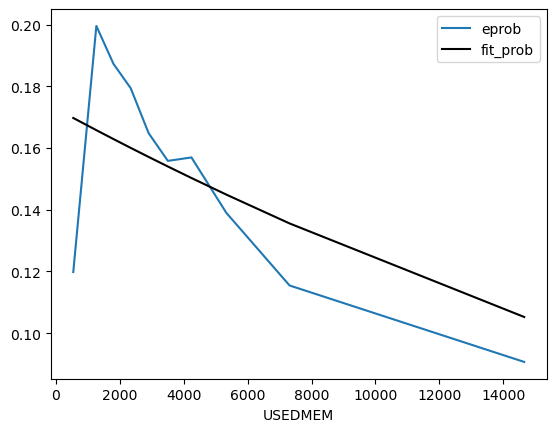

In [63]:
ax = tdvuf_summary.plot(x = 'USEDMEM', y = 'eprob')
tdvuf_summary.plot(x = 'USEDMEM', y = 'fit_prob',
                color = 'black',
                ax = ax);

In [64]:
tdvuf_logreg2 = smf.logit("fail_or_not ~ JOBID",
                          data = typical_day_vs_userfailures).fit()

Optimization terminated successfully.
         Current function value: 0.424044
         Iterations 6


In [65]:
tdvuf_logreg2.params

Intercept   -1.761688
JOBID        0.000040
dtype: float64

In [66]:
tdvuf_logreg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            fail_or_not   No. Observations:                 8922
Model:                          Logit   Df Residuals:                     8920
Method:                           MLE   Df Model:                            1
Date:                Tue, 03 Dec 2024   Pseudo R-squ.:               0.0003757
Time:                        00:56:35   Log-Likelihood:                -3783.3
converged:                       True   LL-Null:                       -3784.7
Covariance Type:            nonrobust   LLR p-value:                   0.09173
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.7617      0.036    -49.281      0.000      -1.832      -1.692
JOBID       3.995e-05   2.31e-05      1.727      0.084   -5.39e-06    8.53e-05
==============================================================================
"""

In [67]:
tdvuf_summary2 = (
    typical_day_vs_userfailures
    .assign(group = pd.qcut(typical_day_vs_userfailures['JOBID'], 
                            q = 10, 
                            duplicates = 'drop'))
    .groupby('group', observed = False)
    [['JOBID', 'fail_or_not']]
    .mean()
    .reset_index()
    .rename(columns = {'fail_or_not': 'eprob'})
)
tdvuf_summary2

,group,JOBID,eprob
0,"(1.999, 122.0]",57.727171,0.087973
1,"(122.0, 209.0]",166.258389,0.134228
2,"(209.0, 290.0]",250.159730,0.147357
3,"(290.0, 382.0]",335.663667,0.147357
4,"(382.0, 487.5]",434.219978,0.150393
5,"(487.5, 611.0]",548.051454,0.155481
6,"(611.0, 783.0]",691.731762,0.175084
7,"(783.0, 1102.8]",920.995511,0.168350
8,"(1102.8, 1753.8]",1374.459641,0.191704
9,"(1753.8, 13346.0]",3491.347144,0.151176


In [68]:
tdvuf_summary2['fit_prob'] = tdvuf_logreg2.predict(tdvuf_summary2[['JOBID']])
tdvuf_summary2

,group,JOBID,eprob,fit_prob
0,"(1.999, 122.0]",57.727171,0.087973,0.146868
1,"(122.0, 209.0]",166.258389,0.134228,0.147412
2,"(209.0, 290.0]",250.159730,0.147357,0.147834
3,"(290.0, 382.0]",335.663667,0.147357,0.148264
4,"(382.0, 487.5]",434.219978,0.150393,0.148762
5,"(487.5, 611.0]",548.051454,0.155481,0.149339
6,"(611.0, 783.0]",691.731762,0.175084,0.150070
7,"(783.0, 1102.8]",920.995511,0.168350,0.151242
8,"(1102.8, 1753.8]",1374.459641,0.191704,0.153582
9,"(1753.8, 13346.0]",3491.347144,0.151176,0.164899


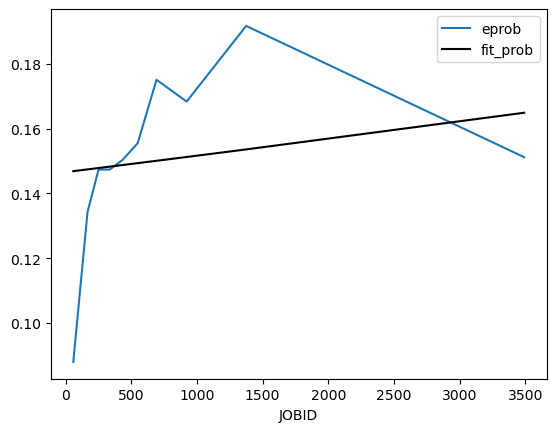

In [69]:
ax = tdvuf_summary2.plot(x = 'JOBID', y = 'eprob')
tdvuf_summary2.plot(x = 'JOBID', y = 'fit_prob',
                color = 'black',
                ax = ax);

In [70]:
tdvuf_logreg3 = smf.logit("fail_or_not ~ TIME_DIFFERENCE",
                          data = typical_day_vs_userfailures).fit()

Optimization terminated successfully.
         Current function value: 0.424118
         Iterations 6


In [71]:
tdvuf_logreg3.params

Intercept         -1.724778e+00
TIME_DIFFERENCE    1.670887e-09
dtype: float64

In [72]:
tdvuf_logreg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            fail_or_not   No. Observations:                 8922
Model:                          Logit   Df Residuals:                     8920
Method:                           MLE   Df Model:                            1
Date:                Tue, 03 Dec 2024   Pseudo R-squ.:               0.0002011
Time:                        00:56:35   Log-Likelihood:                -3784.0
converged:                       True   LL-Null:                       -3784.7
Covariance Type:            nonrobust   LLR p-value:                    0.2172
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.7248      0.030    -58.117      0.000      -1.783      -1.667
TIME_DIFFERENCE  1.671e-09   1.57e-09      1.065      0.287    -1.4e-09    4.75e-09
===================================================================================
"""

In [73]:
tdvuf_summary3 = (
    typical_day_vs_userfailures
    .assign(group = pd.qcut(typical_day_vs_userfailures['TIME_DIFFERENCE'], 
                            q = 10, 
                            duplicates = 'drop'))
    .groupby('group', observed = False)
    [['TIME_DIFFERENCE', 'fail_or_not']]
    .mean()
    .reset_index()
    .rename(columns = {'fail_or_not': 'eprob'})
)
tdvuf_summary3

,group,TIME_DIFFERENCE,eprob
0,"(-1908643633.001, 0.0]",-2.504347e+06,0.151026
1,"(0.0, 258709401.0]",3.542082e+07,0.125000


In [136]:
tdvuf_summary3['fit_prob'] = tdvuf_logreg3.predict(tdvuf_summary3[['TIME_DIFFERENCE']])
tdvuf_summary3

,group,TIME_DIFFERENCE,eprob,fit_prob
0,"(-1908643633.001, 0.0]",-2.504347e+06,0.151026,0.150720
1,"(0.0, 258709401.0]",3.542082e+07,0.125000,0.159013


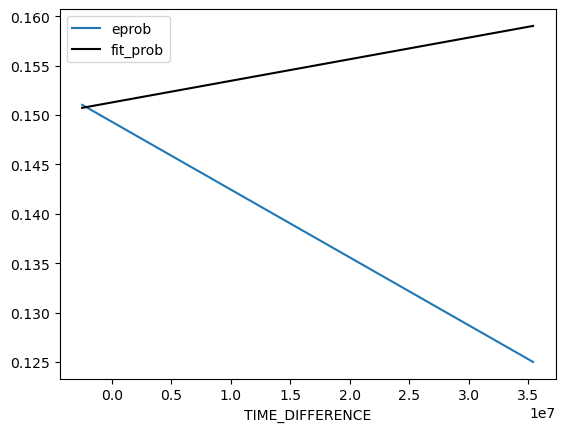

In [138]:
ax = tdvuf_summary3.plot(x = 'TIME_DIFFERENCE', y = 'eprob')
tdvuf_summary3.plot(x = 'TIME_DIFFERENCE', y = 'fit_prob',
                color = 'black',
                ax = ax);

<h5>Looking at specific dates</h5>

In [ ]:
typical_day_vs_userfailures.loc[datetime.date(2020,12,4)]

In [ ]:
typical_day_vs_userfailures.loc[datetime.date(2021,3,23)]

In [ ]:
typical_day_vs_userfailures.describe()

In [ ]:
typical_day_vs_userfailures.shape

In [ ]:
typical_day_vs_userfailures

## Other Misc Work

In [ ]:
display(high_failures_df['END'].value_counts().nunique())
display(low_failures_df['END'].value_counts().nunique())

In [ ]:
jobs_by_month = jobs_filtered.groupby(jobs_filtered['END'].dt.month)['JOBID'].count().reset_index()

In [ ]:
jobs_by_month

In [ ]:
jobs_by_month.describe()

In [ ]:
jobs_filtered.head(2)

In [ ]:
jobs_filtered['END'].dt.hour

In [ ]:
typical_minute_count = jobs_filtered.groupby([jobs_filtered['END'].dt.date, jobs_filtered['END'].dt.hour, jobs_filtered['END'].dt.minute]).agg({'JOBID':'count'})
typical_minute_count.index.names = ['Date', 'Hour','Minute']

In [ ]:
typical_minute_count

In [ ]:
typical_minute_count.describe()

In [ ]:
typical_minute_count[typical_minute_count['JOBID'] == typical_minute_count['JOBID'].max()]

In [ ]:
dec_fourth = typical_minute_count.loc[datetime.date(2020,12,4)]
dec_fourth.loc[10]